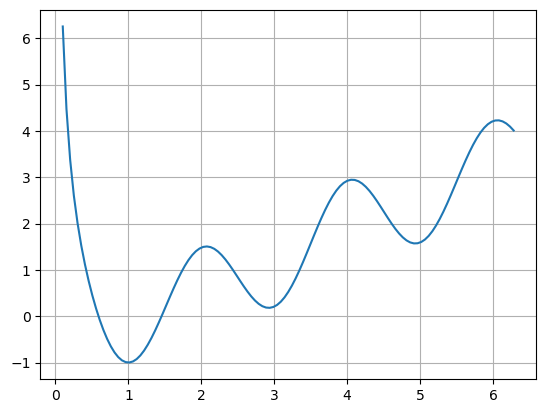

In [1]:
############## LIMITS ################
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Exercise 1: Empirical limits with Numpy

#  estimate the limit as a function approaches an output of 3 and the point where x = 3

def fx(u):
    return np.cos(u*np.pi) + np.log(u)**2

xx = np.linspace(.1,2*np.pi, 123)

plt.plot(xx,fx(xx))
plt.grid()
plt.show()


Estimated Limit approaches 0.20694822840931304 from the left.
Estimated Limit approaches 0.20694969322569812 from the right.
Function value: 0.20694896081258207 at x=3.


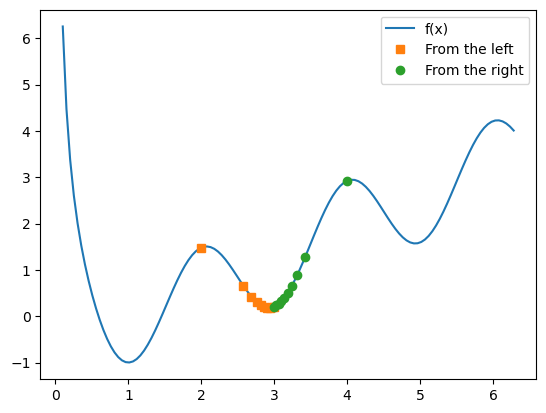

In [ ]:
# approximate the limit as x approaches 3

expFact = 4 # exponent factor that changes how quickly the value of x converges to 3 - the higher this exp., the faster the array asymptotes towards 3 (starts with a larger jump towards 3)
# we need a set of numbers that don't go up to the actual point of x=3 (just below it, so we add a .000001 to the value to subtract from in addition to 1)
g = 1.000001-np.linspace(1,.00001**expFact,10)**(1/expFact) # numbers that go from 0 up to almost/very close to 1
# print(g)
# print(np.linspace(1**expFact,10)**(1/expFact))
# print(1-np.linspace(1**expFact,10)**(1/expFact))


# This modifies the range so that we get numbers that approach 3 
# (we added .000001 to 1 in the first term of g to prevent actually getting to 3, we go just below it 
#  note how the first element here is 2.999999 instead of 3)
xFromLeft  = 3-g # nums less than 3 [2.99999, 2.97...., ...]
xFromRight = 3+g # nums greater than 3 [3.000001, 3.02..., ...]

# function values
limitFromLeft = fx(xFromLeft)
limitFromRight = fx(xFromRight)

# print output values that is closest to the limit (x=3) that we have computed above (an approximation of the limit answer)
print(f'Estimated Limit approaches {limitFromLeft[0]} from the left.') # approximate limit when x = 3 (x is infinitessimally close to 3 from the element in xFromLeft input list in this case)
print(f'Estimated Limit approaches {limitFromRight[0]} from the right.')
print(f'Function value: {fx(3)} at x=3.') # the output of x=3 (remember the shortcut to estimating limits by plugging in the value)
# Note that here the limit is the same as the output value when x=3 of the function. That is not the case if x=0, for example (see plot)


plt.plot(xx,fx(xx),label='f(x)')
plt.plot(xFromLeft,limitFromLeft,'s',label='From the left')
plt.plot(xFromRight,limitFromRight,'o',label='From the right')
plt.legend()
# Plot shows 10 points plotted as x gets closer to 3 on each side in orange squares and green circles
plt.show()

In [ ]:
# Exercise 2: compute Analytic Limits in Sympy

from sympy.abc import x

# The function
sfx = sym.cos(x*sym.pi) + sym.log(x)**2
# x = 3
print( sfx.subs(x,3) ) # the pure symbolic mathematical representation of the real answer
# if you want to numpyify the expression of sympy to get an actual computer number you can use .N:
print( sym.N(sfx.subs(x,3)) ) # converted from abstract sympy form to a concrete computer number
print( fx(3) ) # the answer with numpy of x=3 - the precision is not high enough to be 100% accurate, in practice it is close enough


# Compute Limit with Sympy

  # args: the expression, the input variable, the input value 
sym.limit(sfx, x, 3) # the limit is the same as the value of x=3 since it is a continuous function
# NOTE: the default side sympy uses is the limit from the right
  # This means that the answer shown is the limit as x goes from larger and approaches 3
  # In this case the left and right limits are the same, so the two-sided Limit is the same

# showing limit sides in sympy
sym.limit(sfx, x, 3, dir='-') # left limit
sym.limit(sfx, x, 3, dir='+') # right limit - default
sym.limit(sfx, x, 3, dir='+-') # two-sided limit

-1 + log(3)**2
0.206948960812582
0.20694896081258207


-1 + log(3)**2

(x - 2)**(-2)

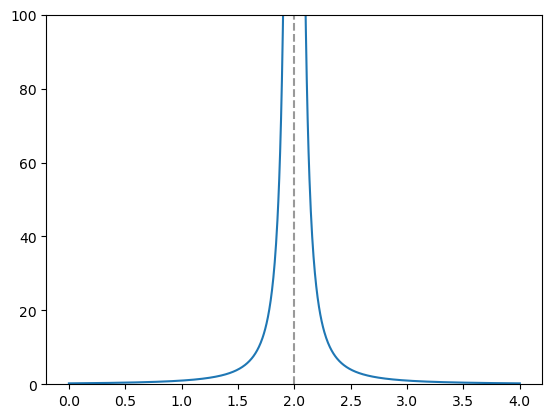

Limit as x->2 from the left: oo
Limit as x->2 from the right: oo
Limit as x->2 (two-sided): oo


In [ ]:
# Exercise 3: Infinite limits

# the function for this exercise that has infinite discontinuity at x = 2 (divide by 0)
sfx2 = 1 / (x-2)**2 # 1/ (x-2)^2
# Note: PEMDAS (Please Excuse My Dear Aunt Sally) - order of operations
# Parentheses, Exponents, Multiplication, Division, Addition, Subtraction
# so in above, the exponent takes priority over the division and happens first on the x-2 term

display(sfx2)

# lambdify so we can use matplotlib to plot
sfx2_lam = sym.lambdify(x,sfx2) # pass in the input var and the expression

# plot with matplotlib
xx = np.linspace(0,4,1001) # NOTE: if we use 1001 steps we get an x = 2 resulting in divide by zero warning. If we use 1000 steps we skip x=2 directly
xx = np.linspace(0,4,1000) # use 1000 to not hit that warning and skip making an x = 2 in the x space
# create a x range and plot against the lambdified sympy expr.
plt.plot(xx,sfx2_lam(xx))
plt.ylim(0,100) # reduce x axis for display so we see features more clearly
# make a dotted colored vertical line for x=2, enter start and end x coords and start and end y coords
plt.plot([2,2],[0,100],'--',color=[.6,.6,.6]) # 60% saturation for rgb channels to get a grey
plt.show()


# print the limits - prints infinity (x=2 is where the infinite discontinuity is due to dividing by 0)
print(f'Limit as x->2 from the left: {sym.limit(sfx2,x,2,dir="-")}')
print(f'Limit as x->2 from the right: {sym.limit(sfx2,x,2,dir="+")}')
print(f'Limit as x->2 (two-sided): {sym.limit(sfx2,x,2,dir="+-")}')


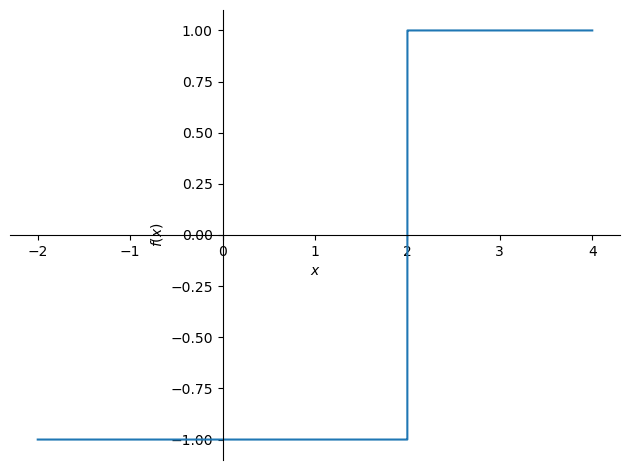

Limit as x->2 from the left: -1
Limit as x->2 from the right: 1


ValueError: The limit does not exist since left hand limit = -1 and right hand limit = 1

In [ ]:
# Exercise 4: Undefined limits

# looking at what happens when you compute a limit that does not exist when x=2

# a function with an undefined limit
fun = sym.Abs(x-2) / (x-2)

sym.plot(fun,(x,-2,4)) # note that the vertical line shown is not correct and just part of sympy plotting - that is where the undefined discontinuity exists

# we can compute the left and right one-sided limits
print(f'Limit as x->2 from the left: {sym.limit(fun,x,2,dir="-")}') # -1
print(f'Limit as x->2 from the right: {sym.limit(fun,x,2,dir="+")}') # 1
print(f'Limit as x->2 (two-sided): {sym.limit(fun,x,2,dir="+-")}') # undefined/error because the two one-sided limits are not equal to each other (we approach a different output when coming from the left or right)


x**3/3 + 100*sqrt(Abs(x))

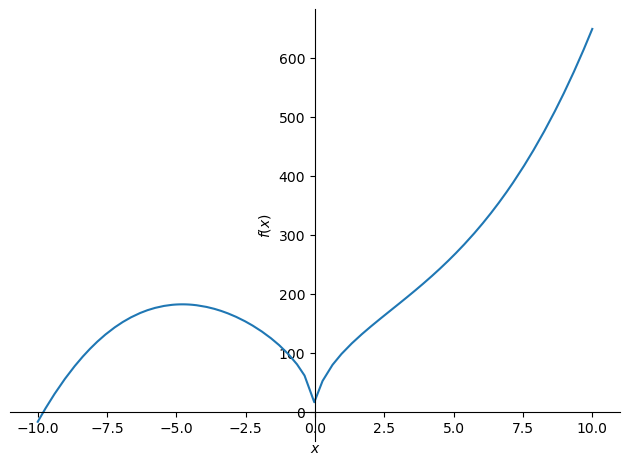

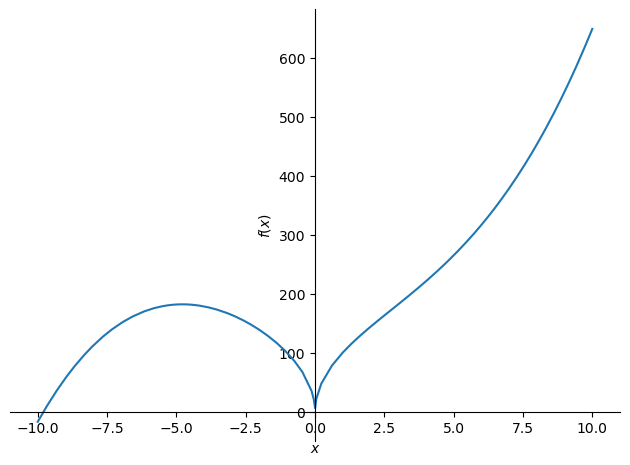

In [4]:
############ PROPERTIES OF LIMITS ##################

import numpy as np
import sympy as sym

### First Property: Limits are factorable -> lim(cf) = c(lim f)

from sympy.abc import x

# define the function for which we're going to demonstrate the property
fx = x**3/3 + 100*sym.sqrt(sym.Abs(x))
display(fx)
p = sym.plot(fx)
p.show()

In [ ]:
# make a random constant to use
# c = np.random.randn(1) # generate 1 random number (in a 1 dim array if you pass in a number arg)
c = np.random.randn() # no argument means just generate one number, not in an array

print('lim(c*fx):')
# use sym.N to numpyify the sympy output (which is hard to read otherwise; the numpy result is just the result number)
print(sym.N(sym.limit(c*fx,x,5))) # print the limit of the function multiplied by the constant as x approaches 5
# note that since we don't pass in a direction, this is the two sided limit, which is fine because there are no discontinuities in the function (as we see in the plot above)
  # (The one sided limits are the same on each side)

print('\n')

# show the factorable property equality
print('c*lim(fx):')
print(sym.N(c*sym.limit(fx,x,5)))

# Note that the constant is random and you can run this cell over and over again and always get the two printed results equal to each other, indicating the property holds
# NOTE: This is not a mathematical PROOF! This is a Empirical Demonstration of the property.

lim(c*fx):
-202.495386729505


c*lim(fx):
-202.495386729505


In [32]:
# Second Property: Limits are Additive -> lim(f+g) = lim f + lim g

# define the two functions f and g
f = sym.log(x) + x**2
g = sym.exp(-x) + x**3

print(sym.limit(f+g,x,np.pi)) # lim(f+g) as x approaches pi
print(sym.limit(f,x,np.pi) + sym.limit(g,x,np.pi)) # lim f + lim g as x approaches pi

# The results will be equal demonstrating the property.

# Now use sympy instead of numpy for using pi
display(sym.limit(f+g,x,sym.pi)) # gives us a technically more accurate number using sympy for pi value vs. using numpy's np.pi (which is an approximation of pi)
# This shows us the REAL Limit, not an approximation as when using numpy

# The tradeoff is using numpy is easier to read, while sympy is more accurate, but more confusing to interpret
  # You can use sym.simplify() to make results a little more readable

print(sym.simplify(sym.limit(f+g,x,sym.pi)))
print(sym.simplify(sym.limit(f,x,sym.pi) + sym.limit(g,x,sym.pi))) 

42.0638248855023
42.0638248855023


exp(-pi) + log(pi) + pi**2 + pi**3

exp(-pi) + log(pi) + pi**2 + pi**3
exp(-pi) + log(pi) + pi**2 + pi**3


In [36]:
# Third Property: Multiplicative prop of Limits -> lim(f x g) = (lim f) x (lim g)

f = sym.log(x) + x**2
g = sym.exp(-x) + x**3

print(sym.limit( f*g, x, np.pi ))
print(sym.limit( f, x, np.pi ) * sym.limit( g, x, np.pi ))
# Results should be the same number demonstrating the multiplicative property

print('\nf^3 as x goes to pi:')
# demonstrate the property applies to exponents as well:
print( sym.limit( f**3, x, np.pi )) # f^3 as x goes to pi
print( sym.limit(f,x,np.pi) * sym.limit(f,x,np.pi) * sym.limit(f,x,np.pi) )

341.989468891742
341.989468891742

f^3 as x goes to pi:
1336.21012967287
1336.21012967287


0.354734782265584
0.354734782265584

Exception to Divisive Property when the limit is undefined:
Limit:


0

Undefined limit in denominator results:
oo
zoo


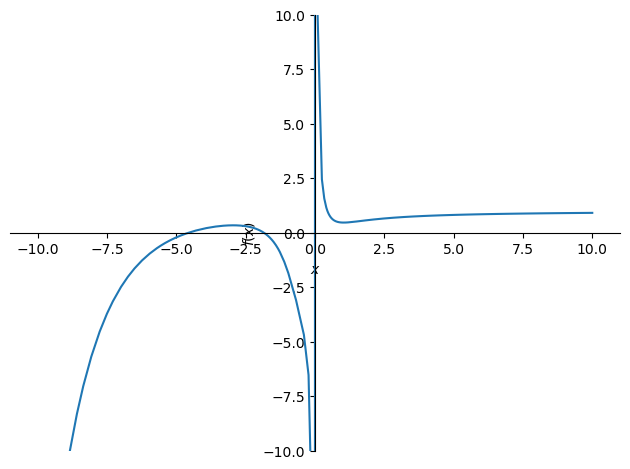

In [ ]:
# Fourth Property: the Divisive property of Limits -> lim(f / g) = (lim f) / (lim g)

# define 3 functions to use for the demonstration
f = sym.log(x) + x**2
g = sym.exp(-x) + x**3

# using f / g as x approaches pi
print(sym.limit( f / g, x, np.pi ))
print(sym.limit( f, x, np.pi ) / sym.limit( g, x, np.pi ))
# results are equal


#### EXCEPTION TO THE DIVISIVE PROPERTY - only valid when the limit exists #####

print('\nException to Divisive Property when the limit is undefined:')
# explore another function h as x approaches 0
h = x**3 + x**2 + x
print('Limit:')
display(sym.limit(h,x,0)) # limit approaches 0 as x approaches 0 as expected

print('Undefined limit in denominator results:')
# g / h as x approaches 0
print(sym.limit( g / h, x, 0 ))
print(sym.limit( g, x, 0 ) / sym.limit( h, x, 0 ))
# The results do NOT Match!!
# zoo represents a complex value for infinity - zed o o

# The limit in the denominator is 0 which means that it is undefined, therefore, the Divisive property does NOT hold in this case!
 # The limit goes up to plus infinity from the right
 # the limit goes down to minus infinity from the left

sym.plot(g/h,ylim=[-10,10]) # shows limits going up from right and down from left to infinities
